In [1]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from keras.datasets import mnist
import numpy as np

(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = np.reshape(x_train, (len(x_train), 28, 28, 1))  # adapt this if using `channels_first` image data format
x_test = np.reshape(x_test, (len(x_test), 28, 28, 1))  # adapt this if using `channels_first` image data format


Using TensorFlow backend.


In [3]:
x_train.shape

(60000, 28, 28, 1)

In [4]:
pd.DataFrame(y_train)[0].unique()

array([5, 0, 4, 1, 9, 2, 3, 6, 7, 8], dtype=uint64)

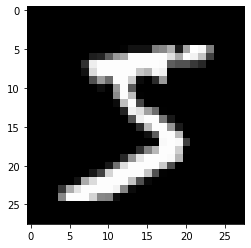

In [6]:
plt.imshow(x_train[0].reshape(28,28),cmap='gray')

In [7]:
28*28

784

In [8]:
from sklearn.tree import DecisionTreeClassifier
model=DecisionTreeClassifier()

In [9]:
x_train=x_train.reshape(60000,784)

In [10]:
model.fit(x_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [11]:
x_test=x_test.reshape(10000,784)

In [12]:
y_predict=model.predict(x_test)
y_predict

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

In [15]:
from sklearn.metrics import accuracy_score,confusion_matrix

In [16]:
accuracy_score(y_test,y_predict)*100

87.75

(10.0, 0.0)


Text(0.5, 1, 'confusion_matrix')

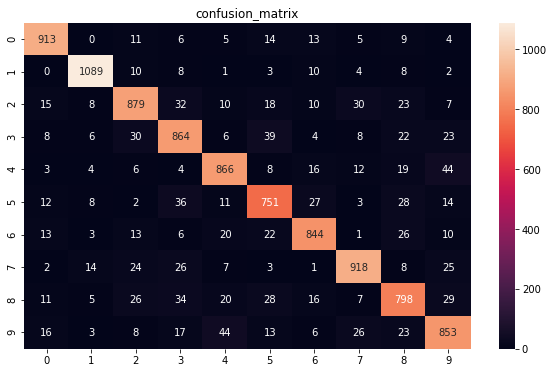

In [17]:
c=confusion_matrix(y_test,y_predict)
plt.figure(figsize=(10,6))
sns.heatmap(c,annot=True,fmt='d')
print(plt.ylim())
plt.ylim(10,0)
plt.title("confusion_matrix")

##### input  the image

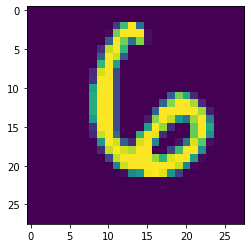

In [18]:
plt.imshow(x_test[88].reshape(28,28))

#####  output using our machine learning

In [19]:
print("Our Prediction",model.predict(x_test[88].reshape(1,-1)))

Our Prediction [6]
